In [5]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_iris
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import os

# Add Graphviz bin folder to PATH (adjust this path if your Graphviz is installed elsewhere)
graphviz_path = r"C:\Program Files\Graphviz\bin"
os.environ["PATH"] += os.pathsep + graphviz_path

# Verify if it's added correctly
print(os.environ["PATH"])

C:\Users\Om\anaconda3;C:\Users\Om\anaconda3\Library\mingw-w64\bin;C:\Users\Om\anaconda3\Library\usr\bin;C:\Users\Om\anaconda3\Library\bin;C:\Users\Om\anaconda3\Scripts;C:\Program Files\Common Files\Oracle\Java\javapath;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;C:\WINDOWS\System32\OpenSSH\;C:\Program Files\Java\jdk-23\bin;C:\Program Files\Java\jdk-23\bin;C:\Program Files\Java\jdk-23\bin;C:\Users\Om\AppData\Local\Microsoft\WindowsApps;C:\Users\Om\AppData\Local\Programs\Microsoft VS Code\bin;;C:\Program Files\Graphviz\bin


# Loading the  data from csv file

In [4]:
data = pd.read_csv(r"C:\Aditya\iris-1.csv")

# Explore the data set from EDA

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Visualize the data set

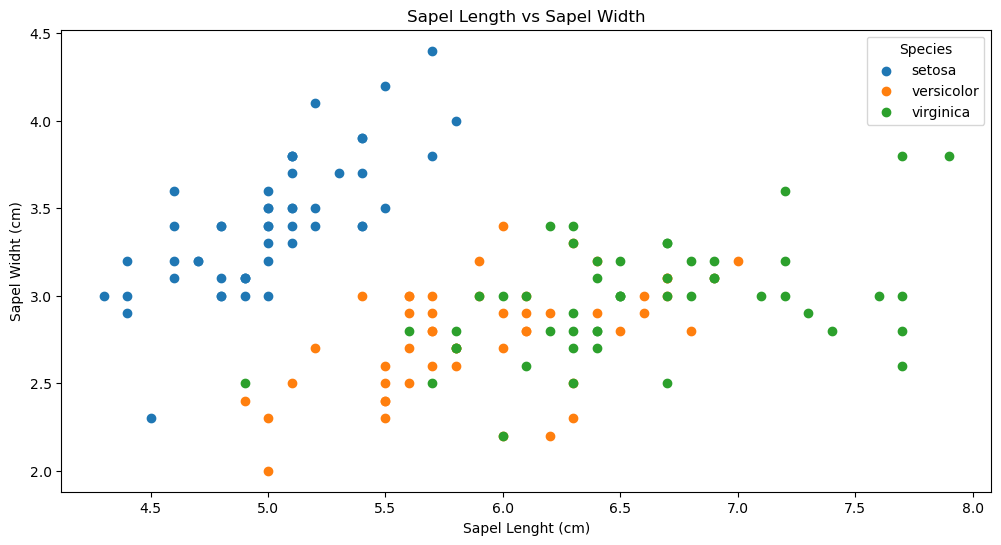

In [9]:
# Scatter plot of features colored by class
plt.figure(figsize=(12, 6))
for species, species_data in data.groupby('species'):
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)
plt.xlabel('Sapel Lenght (cm)')
plt.ylabel('Sapel Widht (cm)')
plt.legend(title='Species')
plt.title('Sapel Length vs Sapel Width')
plt.show()

# Data Rreprocessing 

In [11]:
# Spliting the data into features and target
X = data.drop('species', axis=1)
y = data['species']

In [12]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Decision Tree Classifier

In [14]:
# Create the decision tree classifier
clf = DecisionTreeClassifier()

In [15]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.datasets import load_iris
iris = load_iris()

# Assuming clf is your trained decision tree classifier
dot_data = export_graphviz(
    clf,
    out_file=None,  # None to return as string
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Generate graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Save as PNG
graph.write_png("iris_decision_tree.png")  # Corrected: use quotes to define the filename


True

In [28]:
# Making prediction on testing set
y_pred = clf.predict(X_test)

In [30]:
# Evaluate the model's preformance
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred, average='weighted')
recall = metrics.recall_score(y_test,y_pred, average='weighted')
f1_score = metrics.f1_score(y_test,y_pred, average='weighted')

# Printing Evaluate metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1_Score: {f1_score:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1_Score: 1.00


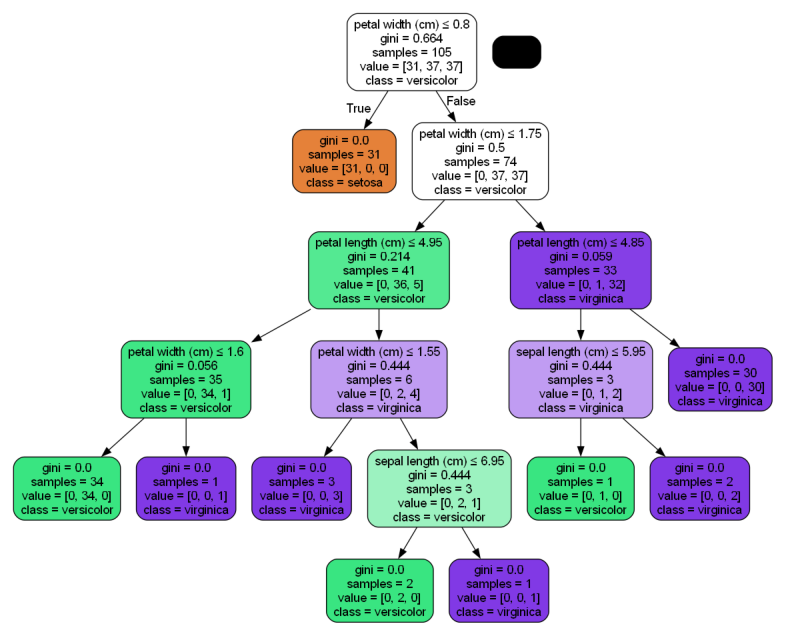

In [32]:
# Show the Decision Tree Visualizations (can be found in correct dictionary)

plt.figure(figsize=(12,8))
plt.imshow(plt.imread("iris_decision_tree.png"))
plt.axis('off')
plt.show()

# Building and Evaluating Random Forest and Gradient Boosting Models
- comparing the results with single Decision tree model

In [35]:
# Import necessary liberaries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [37]:
# Create and train random forest classifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# making prediction using Random Forest 

rf_clf_pred = rf_clf.predict(X_test)

In [41]:
# Evaluate Random forest model

rf_accuracy = metrics.accuracy_score(y_test,rf_clf_pred)
rf_precision = metrics.precision_score(y_test,rf_clf_pred, average='weighted')
rf_recall = metrics.recall_score(y_test,rf_clf_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test,rf_clf_pred, average='weighted')

# Printing evaluation metrics for Random Forest
print("Random Forest Metrics: ")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1_Score: {rf_f1_score:.2f}")


Random Forest Metrics: 
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1_Score: 1.00


In [43]:
# Create and train a Gradiant Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [45]:
# Make predicition using Gradient Boosting
gb_y_pred = gb_clf.predict(X_test)

In [47]:
# Evaluate Gradient Boosting Model 

gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [49]:
# Compare results with single Decision Tree

print("\nComparison with Single Decision Tree:")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison with Single Decision Tree:
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00


# Building & Evaluating Random Forest and Gradient Boosting models

- Comparing the results with the two Decision Tree model

In [52]:
# Create and train two separate Decision Tree classifiers

tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

tree2 = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limited depth for the second tree
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [54]:
# Make predictions using the two decision trees

tree1_y_pred = tree1.predict(X_test)
tree2_y_pred = tree2.predict(X_test)

In [56]:
# Evaluate the first decision 

tree1_accuracy = metrics.accuracy_score(y_test, tree1_y_pred)
tree1_precision = metrics.precision_score(y_test, tree1_y_pred, average='weighted')
tree1_recall = metrics.recall_score(y_test, tree1_y_pred, average='weighted')
tree1_f1_score = metrics.f1_score(y_test, tree1_y_pred, average='weighted')

In [58]:
# Evaluate the second decision tree

tree2_accuracy = metrics.accuracy_score(y_test, tree2_y_pred)
tree2_precision = metrics.precision_score(y_test, tree2_y_pred, average='weighted')
tree2_recall = metrics.recall_score(y_test, tree2_y_pred, average='weighted')
tree2_f1_score = metrics.f1_score(y_test, tree2_y_pred, average='weighted')

In [60]:
# Print evaluation metrics for the two decision trees

print("Decision Tree 1 Metrics:")
print(f"Accuracy: {tree1_accuracy:.2f}")
print(f"Precision: {tree1_precision:.2f}")
print(f"Recall: {tree1_recall:.2f}")
print(f"F1 Score: {tree1_f1_score:.2f}")


print("\nDecision Tree 2 Metrics:")
print(f"Accuracy: {tree2_accuracy:.2f}")
print(f"Precision: {tree2_precision:.2f}")
print(f"Recall: {tree2_recall:.2f}")
print(f"F1 Score: {tree2_f1_score:.2f}")

Decision Tree 1 Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Decision Tree 2 Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [62]:
# Compare the results of all models

print("\nComparison of Models:")
print(f"Decision Tree 1 Accuracy: {tree1_accuracy:.2f}")
print(f"Decision Tree 2 Accuracy: {tree2_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")



Comparison of Models:
Decision Tree 1 Accuracy: 1.00
Decision Tree 2 Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
